In [33]:
import json
from sklearn.model_selection import train_test_split
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

In [210]:
f = open('/Users/apisak.ch/my_code/mango-object-detection/data/mango_dataset_with_annoation_2/instances_default.json')
annotation = json.load(f)


In [211]:
annotation.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [212]:
images = annotation['images']

In [213]:
X_train, X_test = train_test_split(images, train_size=0.85)


In [214]:
len(X_train)

261

In [215]:
X_train

[{'id': 198,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1061.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 49,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1050.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 63,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1074.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 136,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9340.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 182,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_0977.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 89,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1108.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 224,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG

In [216]:
img_id_list = [ x['id'] for x in  X_train]

In [217]:
len(img_id_list)

261

In [218]:
annotation_train = []
annotation_test = []
for i in annotation['annotations']:
    if i['image_id'] in img_id_list:
        annotation_train.append(i)
    else:
        annotation_test.append(i)

In [219]:
t = [i['image_id'] for i in annotation_train]

In [220]:
len(annotation['annotations'])

1823

In [221]:
len(annotation_train) + len(annotation_test)

1823

In [222]:
len(annotation_train)

1563

In [223]:
X_train2, X_val = train_test_split(X_train, train_size=0.85)


In [224]:
len(X_val)

40

In [225]:
img_id_list2 = [ x['id'] for x in  X_train2]

In [226]:
X_train2

[{'id': 131,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9331.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 125,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9318.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 116,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9307.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 118,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9309.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 39,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1032.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 122,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9315.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 123,
  'width': 5184,
  'height': 3456,
  'file_name': 'I

In [227]:
annotation_train2 = []
annotation_val = []
for i in annotation_train:
    if i['image_id'] in img_id_list2:
        annotation_train2.append(i)
    else:
        annotation_val.append(i)
        

In [228]:
len(annotation_train2)

1339

In [229]:
len(annotation_val)

224

In [230]:
len(annotation_train2)+len(annotation_val)+len(annotation_test)

1823

In [231]:
annotation.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [232]:
coco_train = annotation.copy()
coco_val = annotation.copy()
coco_test =annotation.copy()

In [233]:
coco_train['images'] = X_train2
coco_train['annotations'] = annotation_train2

coco_val['images'] = X_val
coco_val['annotations'] = annotation_val

coco_test['images'] = X_test
coco_test['annotations'] = annotation_test



In [234]:
print("coco_train -> img: ",len(coco_train['images']))
print("coco_train -> annotation", len(coco_train['annotations']))

print("coco_val -> img: ",len(coco_val['images']))
print("coco_val -> annotation", len(coco_val['annotations']))

print("coco_test -> img: ",len(coco_test['images']))
print("coco_test -> annotation", len(coco_test['annotations']))

coco_train -> img:  221
coco_train -> annotation 1339
coco_val -> img:  40
coco_val -> annotation 224
coco_test -> img:  47
coco_test -> annotation 260


In [109]:
coco_train['annotations']

[{'id': 10,
  'image_id': 3,
  'category_id': 1,
  'segmentation': [[1690.75,
    2411.39,
    1724.67,
    2436.33,
    1741.63,
    2499.18,
    1727.66,
    2572.0,
    1723.67,
    2652.81,
    1695.74,
    2658.79,
    1627.9,
    2596.94,
    1605.96,
    2498.18,
    1640.87,
    2418.38]],
  'area': 23820.0,
  'bbox': [1605.96, 2411.39, 135.67, 247.4],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 11,
  'image_id': 3,
  'category_id': 1,
  'segmentation': [[1570.12,
    2108.74,
    1578.78,
    2146.26,
    1570.7,
    2190.14,
    1553.38,
    2268.65,
    1538.95,
    2283.08,
    1499.69,
    2238.63,
    1490.45,
    2176.86,
    1492.19,
    2134.14,
    1520.47,
    2117.98]],
  'area': 10905.0,
  'bbox': [1490.45, 2108.74, 88.33, 174.34],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 12,
  'image_id': 3,
  'category_id': 1,
  'segmentation': [[1338.81,
    1864.2,
    1364.58,
    1876.67,
    1395.34,
    1914.91,
    1390.35,
    1968.9

In [235]:
with open("data/mango_dataset_with_annoation_2/to_train/train/annotation_train.json","w",encoding="utf-8") as json_file:
    json.dump(coco_train, json_file)

In [236]:
with open("data/mango_dataset_with_annoation_2/to_train/validate/annotation_val.json","w",encoding="utf-8") as json_file:
    json.dump(coco_val, json_file)

In [237]:
with open("data/mango_dataset_with_annoation_2/to_train/test/annotation_test.json","w",encoding="utf-8") as json_file:
    json.dump(coco_test, json_file)

In [238]:
train_img_file = [i['file_name'] for i in coco_train['images']]
val_img_file = [i['file_name'] for i in coco_val['images']]
test_img_file = [i['file_name'] for i in coco_test['images']]


In [239]:
root_path = "data/mango_dataset_with_annoation_2/dataset"

In [240]:
for i in train_img_file:
    src = root_path+"/"+i
    dst = "data/mango_dataset_with_annoation_2/to_train/train/"+i
    shutil.copyfile(src, dst)



In [241]:
for i in val_img_file:
    src = root_path + "/" + i
    dst = "data/mango_dataset_with_annoation_2/to_train/validate/" + i
    shutil.copyfile(src, dst)

In [242]:
for i in test_img_file:
    src = root_path + "/" + i
    dst = "data/mango_dataset_with_annoation_2/to_train/test/" + i
    shutil.copyfile(src, dst)

In [243]:
img_train = glob.glob("data/mango_dataset_with_annoation_2/to_train/validate/*.jpg")

In [244]:
len(img_train)

40

# EDA

In [245]:
f_train = open('data/mango_dataset_with_annoation_2/to_train/train/annotation_train.json')
annotation_train = json.load(f_train)

f_val = open('data/mango_dataset_with_annoation_2/to_train/validate/annotation_val.json')
annotation_val = json.load(f_val)

f_test = open('data/mango_dataset_with_annoation_2/to_train/test/annotation_test.json')
annotation_test = json.load(f_test)

In [246]:
data_img = {'img_train':len(annotation_train['images']),
           'img_val':len(annotation_val['images']),
           'img_test':len(annotation_test['images'])}

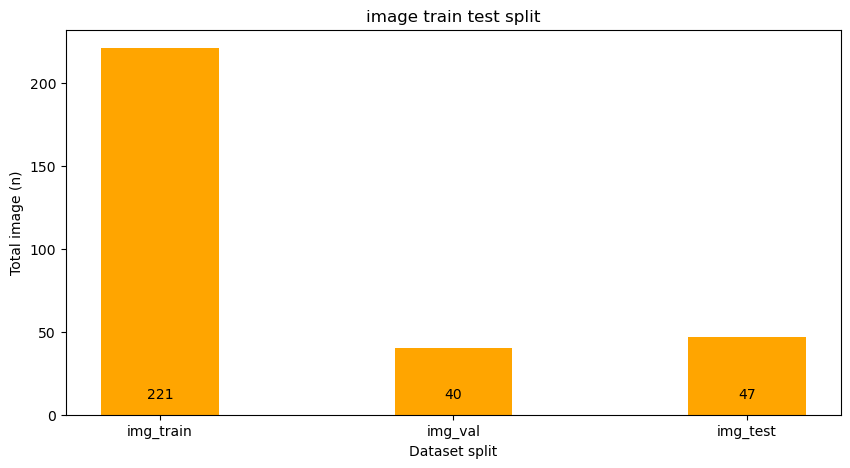

In [247]:
x_value = list(data_img.keys())
y_value = list(data_img.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(x_value, y_value, color ='orange',
        width = 0.4)


plt.text(0,10,y_value[0],ha="center")
plt.text(1,10,y_value[1],ha="center")
plt.text(2,10,y_value[2],ha="center")



plt.xlabel("Dataset split")
plt.ylabel("Total image (n)")
plt.title("image train test split")
plt.show()


In [248]:
data_annotation = {'ann_train':len(annotation_train['annotations']),
           'ann_val':len(annotation_val['annotations']),
           'ann_test':len(annotation_test['annotations'])}

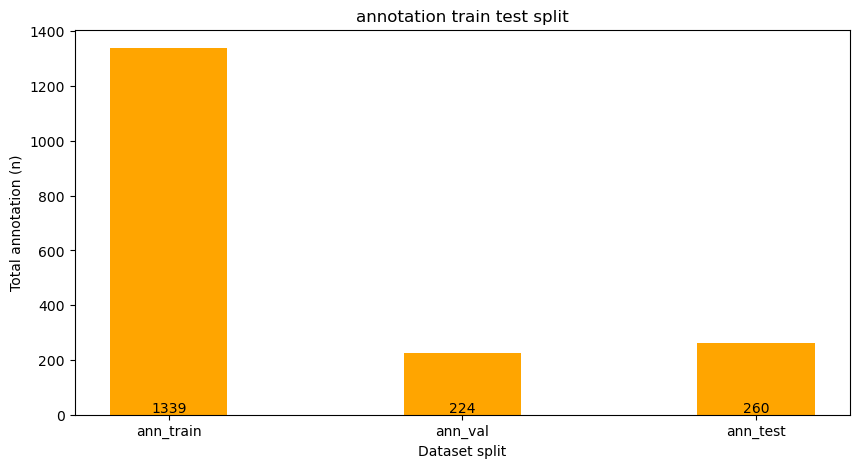

In [249]:
x_value = list(data_annotation.keys())
y_value = list(data_annotation.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(x_value, y_value, color ='orange',
        width = 0.4)


plt.text(0,10,y_value[0],ha="center")
plt.text(1,10,y_value[1],ha="center")
plt.text(2,10,y_value[2],ha="center")



plt.xlabel("Dataset split")
plt.ylabel("Total annotation (n)")
plt.title("annotation train test split")
plt.show()
